#Search Statistics
###Abdul Baqi Sharaf


In this segment I will search for a number of terms in the Quran and vizualize their frequency as a bar chart

See my earlier tutorial on how you get the Quran in a list of dictionaries.
http://abdulbaqi.github.io/quran.html

I have kept these in a module called `quran` and defined a function `ReadQuran` which reads the text file, parses each line and place them in a list of dictionaries. 

In [22]:
import quran

In [23]:
q = quran.ReadQuran()

I want to join all text verses into one string in order  for me to utilize the `find` and `count` method of strings. So, now `qq` holds all text of quran in one string.

In [24]:
s=''
qq=s.join([v['v'] for v in q])

Just a small test to ensure I got things in place.

In [25]:
print(qq[1:100])

سم الله الرحمن الرحيم
الحمد لله رب العالمين
الرحمن الرحيم
مالك يوم الدين
إياك نعبد وإياك نستعين
اهد


another test to check that the `count` function is working!

In [26]:
qq.count('محمد')

4

Now, the idea is to capture the search terms in a list of unicode terms like the following. So, here is a sample search terms for the five main prophets known in arabic as أولو العزم

In [27]:
search=['عيسى','موسى','نوح','إبراهيم', 'محمد']

A check that `count` function works OK. So, the term `Musa` occurs 136 times in the Quran. 

It is always good to verify this with the authentic website of the QuranComplex.org
http://qurancomplex.gov.sa/IdIndex/default.asp?harf=1&l=arb&job=wordlist&Page=1&word=%E3%E6%D3%EC&button1=%C8%CD%CB 

In [28]:
qq.count('موسى')

136

The next step is to write a function that takes this list of search terms and return a list of their frequencies. I will call the function `qcount`. 

I am using a `lambda` function which applies the string `count` function on each element of the term list.

In [29]:
def qcount(terms):
    return [qq.count(x) for x in terms]
    

Let us test that. 

One disclaimer I must mention, is that sometimes the morphological root could increase the search terms. For example (نوح) Noah was counted 50 times whereas the actual count according to the QuranComplex site is 43, and I think the 7 additional counts came out of roots of the word (نوحي) meaning revelation

In [30]:
print(qcount(search))

[25, 136, 50, 69, 4]


Great!

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

I had to struggle to get Arabic display with `matplotlib`...

with some search I realized that I have to use two more libraries. Here are some useful links.

https://pypi.python.org/pypi/python-bidi

http://stackoverflow.com/questions/18772950/right-to-left-support-in-python-networkx-and-matplotlib

In [32]:
import numpy as np
from bidi.algorithm import get_display
import arabic_reshaper
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

So, I had to import a number of modules and set few parameters to render my Arabic graphics correctly. Make sure that the fonts you choose exists in your machine. 

In what follows, I am setting the content of x,y axis of this bar graph, and then providing title and x and y labesl. 

`plt.xticks` need to be done well. You have to study this and set the parameters correctly. The magic goes into the lambda function where I passed each search term into the `arabic_reshaper` method and then passed that to the `get_display` method for bidirectional and constructed a list of the new displays. 

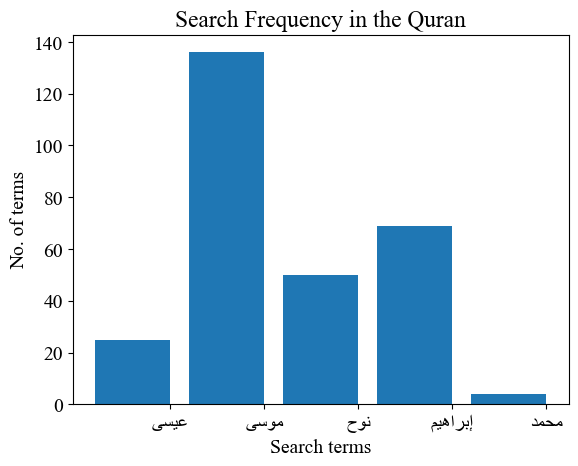

In [33]:
plt.bar(range(len(search)), qcount(search))
plt.title('Search Frequency in the Quran')
plt.ylabel('No. of terms')
plt.xlabel('Search terms')
plt.xticks(np.arange(len(search)) + 0.4, list(map(lambda x: get_display(arabic_reshaper.reshape(x)), search)))
plt.show()